In [13]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import io

# generating training dataset


In [2]:
# upload file with dictionary format, with key as name of uploaded file
# and corresponding values as the contens of the file
from google.colab import files
uploaded_train = files.upload()
uploaded_test = files.upload()


Saving Train_Data.txt to Train_Data.txt


Saving Test_Data.txt to Test_Data.txt


In [22]:
# use panda and io pachage to load txt.
df_train = pd.read_csv(io.StringIO(uploaded_train['Train_Data.txt'].decode("utf-8")),
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
print(df_train)

df_test = pd.read_csv(io.StringIO(uploaded_test['Test_Data.txt'].decode("utf-8")),
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
print(df_test)
#replace missing value ? with 0


          ID  x1  x2  x3  x4  x5  x6  x7  x8  x9  class
0    1000025   5   1   1   1   2   1   3   1   1      2
1    1002945   5   4   4   5   7  10   3   2   1      2
2    1015425   3   1   1   1   2   2   3   1   1      2
3    1016277   6   8   8   1   3   4   3   7   1      2
4    1017023   4   1   1   3   2   1   3   1   1      2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
594  1315506   4   8   6   3   4  10   7   1   1      4
595  1320141   5   1   1   1   2   1   2   1   1      2
596  1325309   4   1   2   1   2   1   2   1   1      2
597  1333063   5   1   3   1   2   1   3   1   1      2
598  1333495   3   1   1   1   2   1   2   1   1      2

[599 rows x 11 columns]
         ID  x1  x2  x3  x4  x5 x6  x7  x8  x9  class
0   1334659   5   2   4   1   1  1   1   1   1      2
1   1336798   3   1   1   1   2  1   2   1   1      2
2   1344449   1   1   1   1   1  1   2   1   1      2
3   1350568   4   1   1   1   2  1   2   1   1      2
4   1352663   5   4   6   8   4  

## Feature Selection or Manipulation


In [23]:
from sklearn.preprocessing import StandardScaler

df_train.drop('ID', axis=1, inplace=True)
df_test.drop('ID', axis=1, inplace=True)

df_train.replace('?', np.nan, inplace=True)
df_test.replace('?', np.nan, inplace=True)

df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

X = df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']]
y = df_train['class'].replace({2:0, 4:1})

X_test_df = df_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']]
y_test_df = df_test['class'].replace({2:0, 4:1})

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X)
x_test_scaled = scaler.transform(X_test_df)

x_train = torch.Tensor(x_train_scaled)
print(x_train.shape)

y_train = torch.Tensor(y.values).unsqueeze(1)
print(y_train.shape)

x_test = torch.Tensor(x_test_scaled)
y_test = torch.Tensor(y_test_df.values).unsqueeze(1)
print(x_test.shape)

torch.Size([584, 9])
torch.Size([584, 1])
torch.Size([99, 9])


# Define model class
z = w1*x1 + w2*x2 + w3*x3 ....  + w6*x6 + b  -> <br>
y = a = sigma(z) -> <br>
L(y_hat = a, y)


In [24]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred   #probability (not direct value)

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

print(x_train.shape)

# instantiate model class
torch.manual_seed(1)
model = LogisticRegression(x_train.shape[1], 1) # [500, 2]
print(list(model.parameters()))



torch.Size([584, 9])
[Parameter containing:
tensor([[ 0.1718, -0.1471, -0.0646,  0.1565, -0.3138,  0.1999, -0.0686,  0.1696,
          0.0463]], requires_grad=True), Parameter containing:
tensor([-0.0408], requires_grad=True)]


# function to get model parameters (w1, w2, b)

In [25]:
[w, b] = model.parameters() # Ws, bias
print(w)
# w1, w2= w.view(x_train.shape[1])

# def get_params():
#   return (w1.item(), w2.item(), b[0].item())

Parameter containing:
tensor([[ 0.1718, -0.1471, -0.0646,  0.1565, -0.3138,  0.1999, -0.0686,  0.1696,
          0.0463]], requires_grad=True)


# training the model

In [26]:
# instantitate optimizer
criterion = nn.BCELoss()  # = nn.CrossEntropyLoss() # for LR with more than 2 classes
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.9) #weight_decay=1e-5 -> L2 regularizer

# training the model
epochs = 300
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)

  # calculate loss
  loss = criterion(y_pred, y_train)

  # L2 regularizer
  l_lambda = 0.01
  l_reg = torch.tensor(0.)
  for param in model.parameters():
      # L2 정규화: 가중치(param)의 제곱의 합 사용
      l_reg += torch.sum(param**2)
  loss += l_lambda * l_reg

  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad() # clear gradients wrt parameters
  loss.backward()
  optimizer.step()

epoch:  0 loss:  0.6552874445915222
epoch:  1 loss:  0.6352561116218567
epoch:  2 loss:  0.5992981195449829
epoch:  3 loss:  0.5525709986686707
epoch:  4 loss:  0.5003945827484131
epoch:  5 loss:  0.4474477469921112
epoch:  6 loss:  0.3972253203392029
epoch:  7 loss:  0.3518773317337036
epoch:  8 loss:  0.3123767077922821
epoch:  9 loss:  0.2788504362106323
epoch:  10 loss:  0.25091516971588135
epoch:  11 loss:  0.22793874144554138
epoch:  12 loss:  0.2092108428478241
epoch:  13 loss:  0.19404099881649017
epoch:  14 loss:  0.1818063110113144
epoch:  15 loss:  0.17196880280971527
epoch:  16 loss:  0.16407641768455505
epoch:  17 loss:  0.15775561332702637
epoch:  18 loss:  0.1527012288570404
epoch:  19 loss:  0.14866569638252258
epoch:  20 loss:  0.1454489529132843
epoch:  21 loss:  0.14288979768753052
epoch:  22 loss:  0.14085842669010162
epoch:  23 loss:  0.13925038278102875
epoch:  24 loss:  0.1379816234111786
epoch:  25 loss:  0.13698449730873108
epoch:  26 loss:  0.13620449602603912

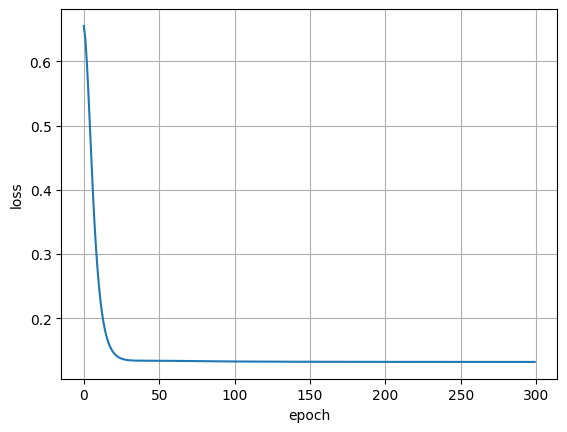

In [27]:
# log loss
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()


# model evalation with new datasets the model has never seen before

In [20]:
X_test = df_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})
Y_test = df_test['class'].replace({2:0, 4:1})
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant

x_test = torch.Tensor(np.array([X_test['x1'], X_test['x2']]).astype(np.uint8)).t()  # str to unit, [3, 500] ->  [500, 3]
print(x_test.shape)
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_test = torch.Tensor(Y_test).unsqueeze(1) # [500] -> [500, 1]
print(y_test.shape)

torch.Size([99, 2])
torch.Size([99, 1])


In [28]:
#model test w/ all test datasets
no_correct = 0
for i in range(len(x_train)):
  if model.predict(x_train[i]) == y_train[i]:
    no_correct += 1

accuracy = no_correct/len(x_train)*100
print("Predcition accuracy_train= {}%".format(accuracy))

no_correct_test=0
for i in range(len(x_test)):
  if model.predict(x_test[i]) == y_test[i]:
    no_correct_test += 1

accuracy = no_correct_test/len(x_test)*100

print("Predcition accuracy_test= {}%".format(accuracy))

Predcition accuracy_train= 96.74657534246576%
Predcition accuracy_test= 98.98989898989899%
